In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [31]:
# Replace 'dataset_file.csv' with the actual path to your dataset file
df = pd.read_csv('Employee.csv')
df.info() #showing information about my data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [32]:
df.duplicated().sum()

1889

In [33]:
df = df.drop_duplicates()

In [34]:
df.duplicated().sum()

0

In [35]:
#the total num of nulls of each column 
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [36]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [37]:
#getting the columns name
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [38]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [39]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [40]:
unique_education_values = df['Education'].unique()
print(unique_education_values)

['Bachelors' 'Masters' 'PHD']


In [41]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "EverBenched" column
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

In [42]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "EverBenched" column
df['EverBenched_encoded'] = label_encoder.fit_transform(df['EverBenched'])


In [43]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "EverBenched" column
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])

In [44]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_encoded,EverBenched_encoded,Education_encoded
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,1,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0,0,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1,0,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,0,0,1
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,1,0,0
4649,Masters,2013,Pune,2,37,Male,No,2,1,1,0,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1,0,1


In [45]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot',
       'Gender_encoded', 'EverBenched_encoded', 'Education_encoded'],
      dtype='object')

In [46]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
Gender_encoded                int32
EverBenched_encoded           int32
Education_encoded             int32
dtype: object

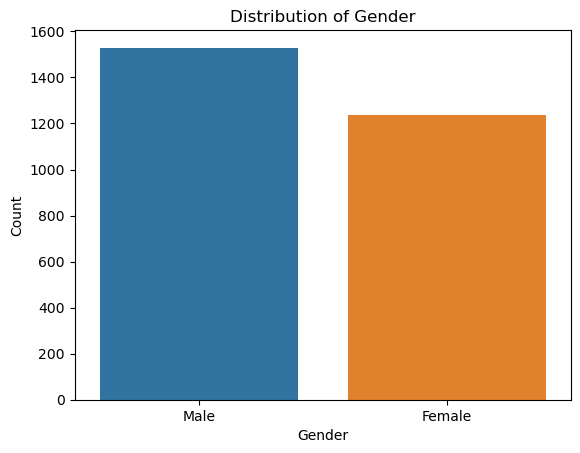

In [47]:
# Countplot of Gender
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

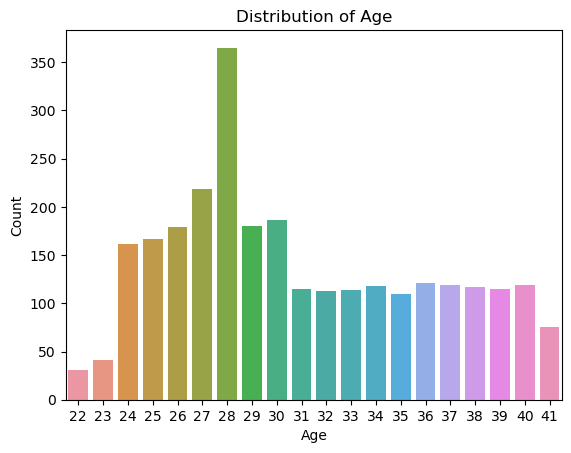

In [48]:
# Countplot of Age
sns.countplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

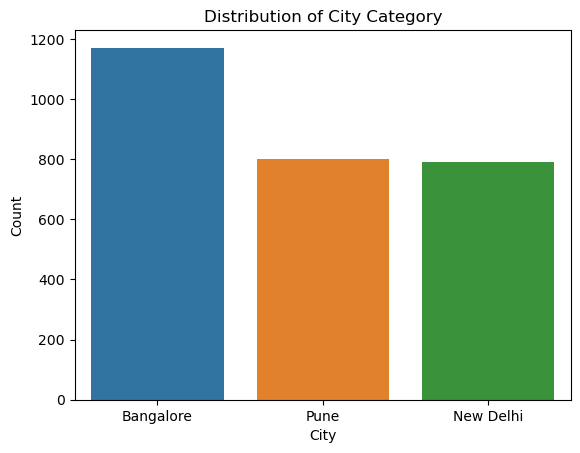

In [49]:
# Countplot of City_Category
sns.countplot(data=df, x='City')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of City Category')
plt.show()


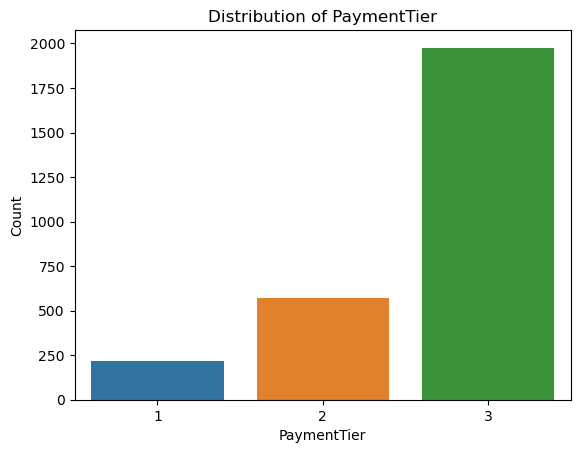

In [50]:
# Countplot of PaymentTier
sns.countplot(data=df, x='PaymentTier')
plt.xlabel('PaymentTier')
plt.ylabel('Count')
plt.title('Distribution of PaymentTier')
plt.show()

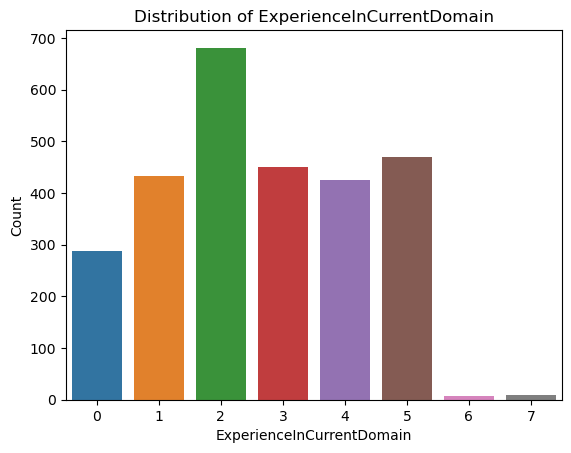

In [51]:
# Countplot of ExperienceInCurrentDomain
sns.countplot(data=df, x='ExperienceInCurrentDomain')
plt.xlabel('ExperienceInCurrentDomain')
plt.ylabel('Count')
plt.title('Distribution of ExperienceInCurrentDomain')
plt.show()

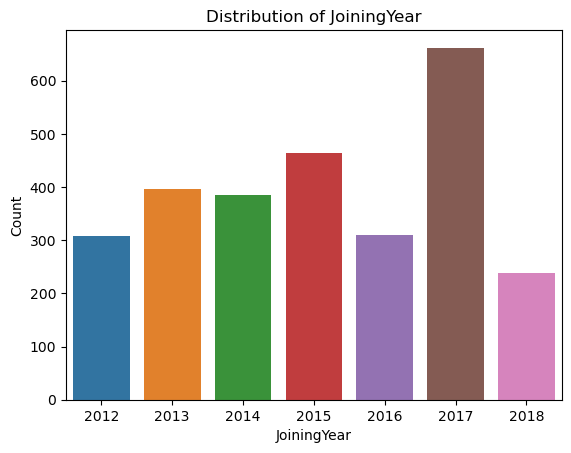

In [52]:
# Countplot of ExperienceInCurrentDomain
sns.countplot(data=df, x='JoiningYear')
plt.xlabel('JoiningYear')
plt.ylabel('Count')
plt.title('Distribution of JoiningYear')
plt.show()

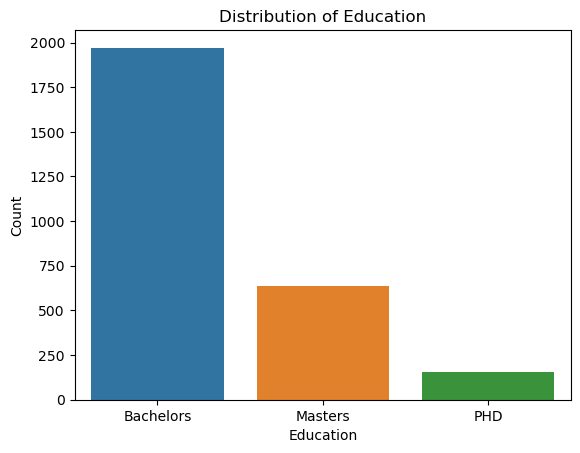

In [53]:
# Countplot of ExperienceInCurrentDomain
sns.countplot(data=df, x='Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

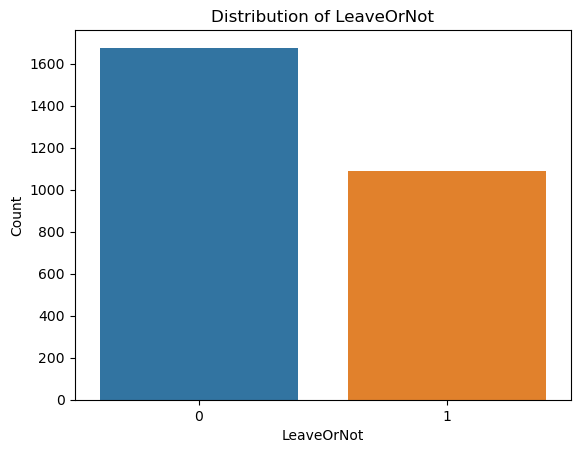

In [54]:
# Countplot of LeaveOrNot
sns.countplot(data=df, x='LeaveOrNot')
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot')
plt.show()

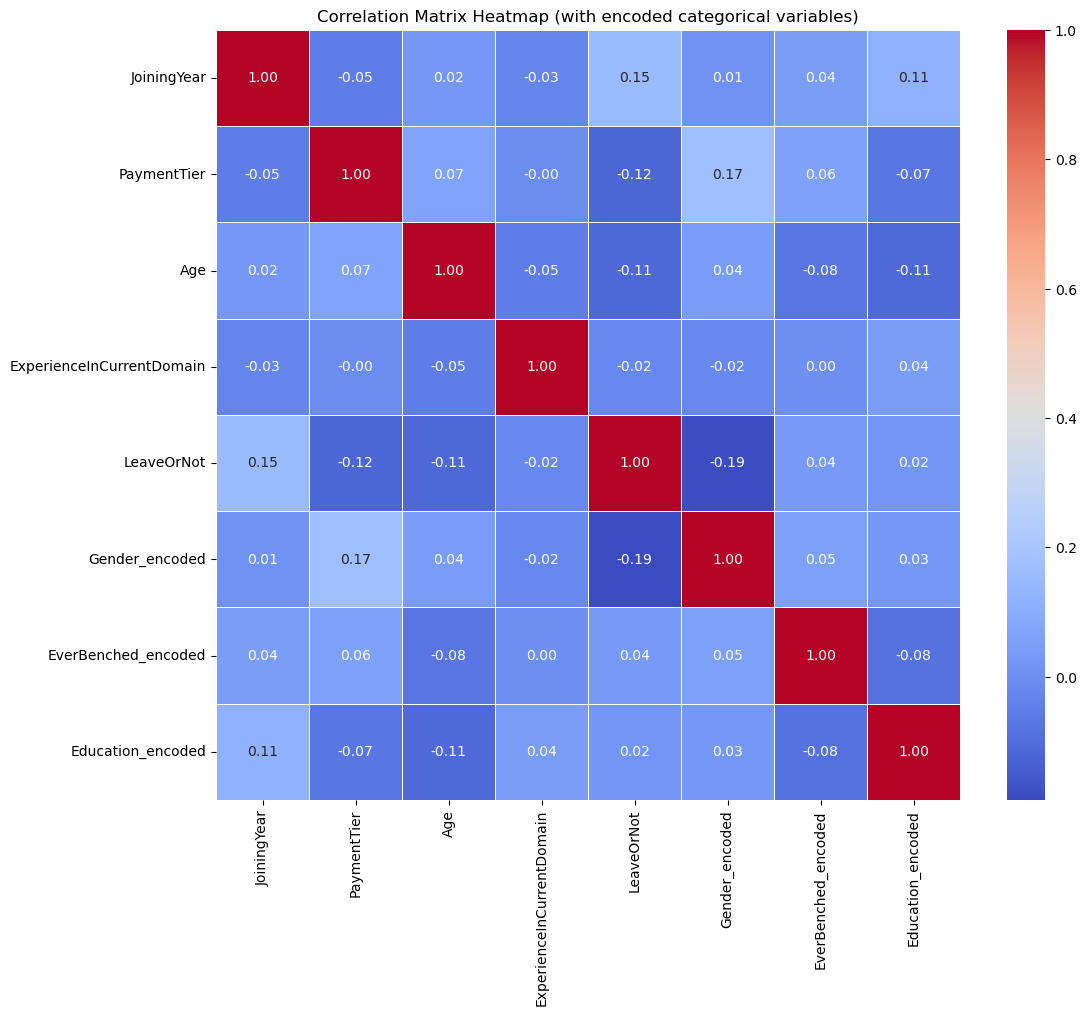

In [55]:
# Assuming 'Education' is a categorical variable
df_encoded = pd.get_dummies(df, columns=['Education'])

# Now select only numeric columns
numeric_df_encoded = df_encoded.select_dtypes(include=['number'])

correlation_matrix_encoded = numeric_df_encoded.corr()

# Create a heatmap for the encoded dataframe
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap (with encoded categorical variables)')
plt.show()


In [56]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_encoded,EverBenched_encoded,Education_encoded
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,1,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0,0,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1,0,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,0,0,1
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,1,0,0
4649,Masters,2013,Pune,2,37,Male,No,2,1,1,0,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1,0,1


In [57]:
#LogisticRegression

# Assuming 'Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', and 'ExperienceInCurrentDomain' are your features
X = df[['Education_encoded', 'JoiningYear', 'PaymentTier', 'Age', 'Gender_encoded', 'EverBenched_encoded', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']  # Replace 'Target' with the actual name of your target column

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

In [61]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [64]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.6582278481012658


In [65]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[287  46]
 [143  77]]


In [66]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       333
           1       0.63      0.35      0.45       220

    accuracy                           0.66       553
   macro avg       0.65      0.61      0.60       553
weighted avg       0.65      0.66      0.63       553



In [67]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
LeaveOrNot
0    1343
1     868
Name: count, dtype: int64

Test set class distribution:
LeaveOrNot
0    333
1    220
Name: count, dtype: int64


In [68]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_encoded,EverBenched_encoded,Education_encoded
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,1,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,0,0,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,0,0,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,1,0,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,0,0,1
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,1,0,0
4649,Masters,2013,Pune,2,37,Male,No,2,1,1,0,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,1,0,1


In [73]:
#DecisionTreeClassifier

# Assuming 'Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', and 'ExperienceInCurrentDomain' are your features
X = df[['Education_encoded', 'JoiningYear', 'PaymentTier', 'Age', 'Gender_encoded', 'EverBenched_encoded', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']  # Replace 'Target' with the actual name of your target column

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

In [76]:
# Train the model
model.fit(X_train, y_train_d)

DecisionTreeClassifier(random_state=42)

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [78]:
# Evaluate the model
accuracy = accuracy_score(y_test_d, y_pred)
conf_matrix = confusion_matrix(y_test_d, y_pred)
classification_rep = classification_report(y_test_d, y_pred)

In [79]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.6853526220614828


In [80]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[256  77]
 [ 97 123]]


In [81]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       333
           1       0.61      0.56      0.59       220

    accuracy                           0.69       553
   macro avg       0.67      0.66      0.67       553
weighted avg       0.68      0.69      0.68       553



In [82]:
print("Training set class distribution:")
print(y_train_d.value_counts())

print("\nTest set class distribution:")
print(y_test_d.value_counts())

Training set class distribution:
LeaveOrNot
0    1343
1     868
Name: count, dtype: int64

Test set class distribution:
LeaveOrNot
0    333
1    220
Name: count, dtype: int64


In [83]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Make predictions
predictions = random_forest.predict(X_test)

In [85]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [86]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6980108499095841
Confusion Matrix:
[[261  72]
 [ 95 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       333
           1       0.63      0.57      0.60       220

    accuracy                           0.70       553
   macro avg       0.68      0.68      0.68       553
weighted avg       0.69      0.70      0.69       553



In [87]:
#SVC

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Create an SVM model
svm = SVC(kernel='linear')

In [89]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [90]:
# Make predictions
predictions = svm.predict(X_test_scaled)

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.6021699819168174
Confusion Matrix:
[[333   0]
 [220   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       333
           1       0.00      0.00      0.00       220

    accuracy                           0.60       553
   macro avg       0.30      0.50      0.38       553
weighted avg       0.36      0.60      0.45       553



In [93]:
#KNN(KNeighborsClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [94]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [95]:
# Make predictions
predictions = knn.predict(X_test_scaled)

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [97]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7124773960216998
Confusion Matrix:
[[272  61]
 [ 98 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.77       333
           1       0.67      0.55      0.61       220

    accuracy                           0.71       553
   macro avg       0.70      0.69      0.69       553
weighted avg       0.71      0.71      0.71       553



In [98]:
#neural_network(MLPClassifier)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

In [99]:
# Train the model
neural_network.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [100]:
# Make predictions
predictions = neural_network.predict(X_test_scaled)

In [101]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [102]:
#
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7775768535262206
Confusion Matrix:
[[309  24]
 [ 99 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       333
           1       0.83      0.55      0.66       220

    accuracy                           0.78       553
   macro avg       0.80      0.74      0.75       553
weighted avg       0.79      0.78      0.77       553

